In [2]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


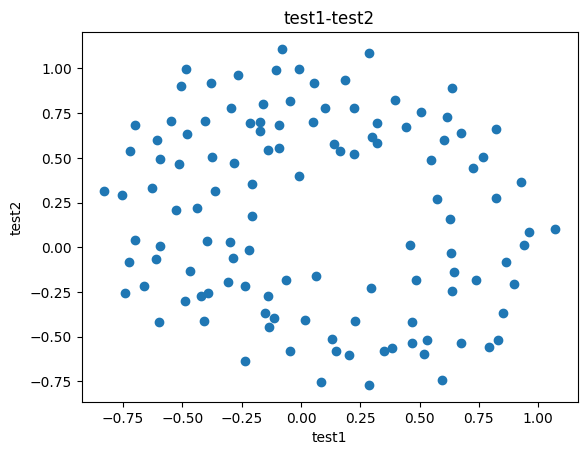

In [3]:
#visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'test1'],data.loc[:,'test2'])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.show()

In [5]:
#add label mask
mask=data.loc[:,'pass']==1
print(mask)

0       True
1       True
2       True
3       True
4      False
       ...  
113    False
114    False
115    False
116    False
117    False
Name: pass, Length: 118, dtype: bool


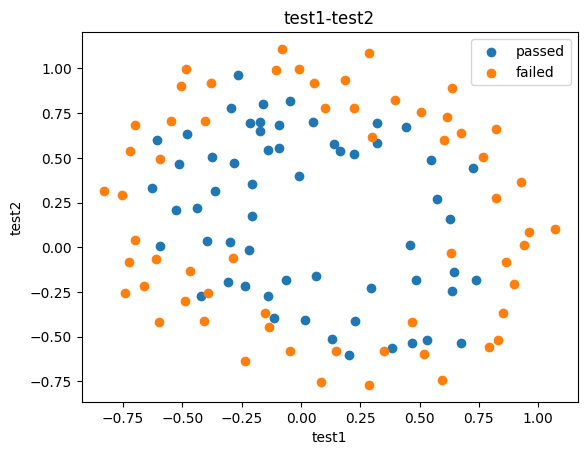

In [7]:
fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [9]:
#define X,y
X = data.drop(['pass'],axis=1)
y = data.loc[:,'pass']
X1 = data.loc[:,'test1']
X2 = data.loc[:,'test2']
X1.head()

0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4    0.183760
Name: test1, dtype: float64

In [11]:
# create new data
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}#将所有数据放到一个字典里面
X_new = pd.DataFrame(X_new) #方便后面进行模型数据的加载
print(X_new)

           X1        X2      X1_2      X2_2     X1_X2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [14]:
#establish new model and train
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression()
LR1.fit(X_new,y)

LogisticRegression()

In [17]:
#show the predicted result and its accuracy
from sklearn.metrics import accuracy_score
y1_predict = LR1.predict(X_new)
accuracy1 = accuracy_score(y,y1_predict)
print(accuracy1)

0.8135593220338984


E:\python\anaconda3\envs\test\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


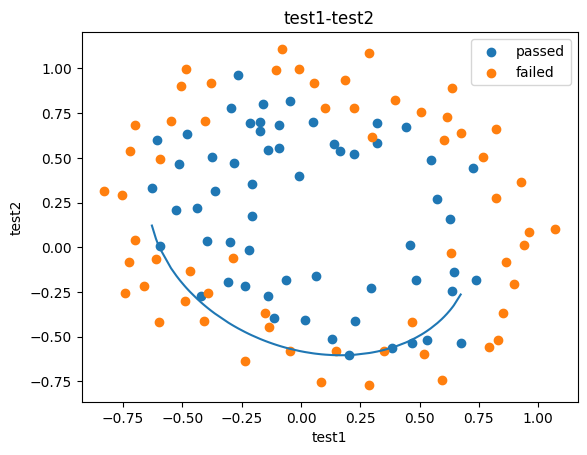

In [18]:
X1_new = X1.sort_values()
theta0 = LR1.intercept_
theta1,theta2,theta3,theta4,theta5 = LR1.coef_[0][0],LR1.coef_[0][1],LR1.coef_[0][2],LR1.coef_[0][3],LR1.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [27]:
#define f(x)
def f(x):
    a = theta4
    b = theta5*x+theta2
    c = theta0+theta1*x+theta3*x*x
    X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    return X2_new_boundary1,X2_new_boundary2

In [21]:
X2_new_boundary1 = [] 
X2_new_boundary2 = []
for x in X1_new:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])
print(X2_new_boundary1,X2_new_boundary2)

[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([0.1212617]), array([0.04679448]), array([0.02697935]), array([0.00872189]), array([-0.00830576]), array([-0.00830576]), array([-0.11718731]), array([-0.16040224]), array([-0.18016521]), array([-0.18965258]), array([-0.21671004]), array([-0.22530078]), array([-0.23369452]), array([-0.2499261]), array([-0.28761583]), array([-0.30846849]), array([-0.32171919]), array([-0.32816104]), array([-0.33448523]), array([-0.34069505]), array([-0.35278365]), array([-0.35866807]), array([-0.37013014]), array([-0.42186137]), array([-0.42656594]), array([-0.43119936]), array([-0.43574686]), array([-0.44021779]), array([-0.45318277]), array([-0.47336128]), array([-0.47336128]), array([-0.48465118]), array([-0.48828317]), array([-0.49185073]), array([-0.49185073]), array([-0.51193977]), array([-0.51193977]), array([-0.5181489]), array([-0.52412149]), array([-0.52986615]), array([-0.5298

C:\Users\fbozh\AppData\Local\Temp\ipykernel_15092\1482556590.py:6: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
C:\Users\fbozh\AppData\Local\Temp\ipykernel_15092\1482556590.py:7: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)


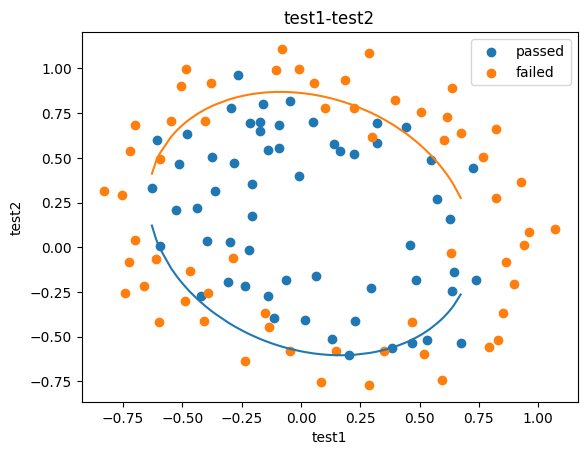

In [22]:
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary1)
plt.plot(X1_new,X2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show();

In [47]:
X1_range = [-0.9 + x/10000 for x in range(0,19000)]
X1_range = np.array(X1_range) #转换成数组
X2_new_boundary1 = []
X2_new_boundary2 = []
for x in X1_range:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

C:\Users\fbozh\AppData\Local\Temp\ipykernel_15092\1482556590.py:6: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
C:\Users\fbozh\AppData\Local\Temp\ipykernel_15092\1482556590.py:7: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)


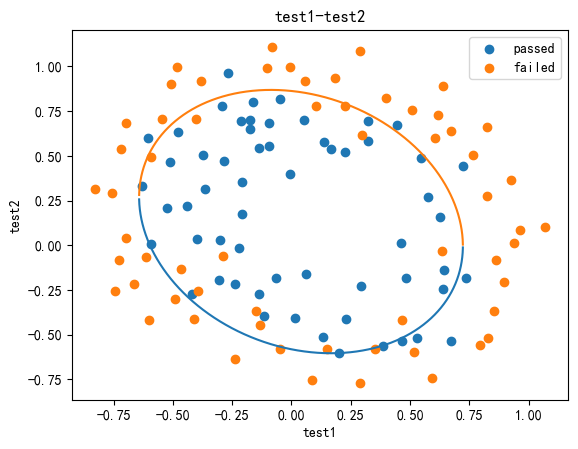

In [46]:
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_range,X2_new_boundary1)
plt.plot(X1_range,X2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show();